##### Import statements

In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# inorder to download VADER lexicon uncomment two lines below
# import nltk
# nltk.download( "vader_lexicon")

##### Loading textual dataset

In [2]:
df = pd.read_csv( "data/result/cnbc-data.csv", sep=";")

##### Calculate polarity score

In [3]:
neg = []
neu = []
pos = []
compound = []

sid = SentimentIntensityAnalyzer()

for txt in df[ "text"]:
	score = sid.polarity_scores( txt)
	neg.append( score[ "neg"])
	neu.append( score[ "neu"])
	pos.append( score[ "pos"])
	compound.append( score[ "compound"])

df[ "neg"] = neg
df[ "neu"] = neu
df[ "pos"] = pos
df[ "compound"] = compound

##### Sentiment scores of first five samples

In [4]:
for i in range( 5):
	row = df.iloc[ i]
	print( f"Text: { row[ 'text']}")
	print( f"neg: { row[ 'neg']}, neu: { row[ 'neu']}, pos: { row[ 'pos']}, compound: { row[ 'compound']}")

Text: One year on: Is Finland’s free money experiment working?, One year ago, Finland started giving out free money in a first-of-its kind experiment. Here’s how it’s going., Europe News,Jobs,World Markets
neg: 0.0, neu: 0.668, pos: 0.332, compound: 0.9081
Text: Marketing strategies from the world’s top CEOs and entrepreneurs, From listening into customer care calls to starring in their own commercials, here are some top marketing tips from the world's most successful CEOs, Marketing,SAP AG,Soho China Ltd,Unilever PLC,Meta Platforms Inc,T-Mobile US Inc
neg: 0.0, neu: 0.777, pos: 0.223, compound: 0.8718
Text: Compass Group chief, five others dead in Sydney seaplane crash, The CEO of Compass Group Plc and four of his close family members were among the six people who died when the seaplane they were travelling in crashed into a Sydney river on New Year's Eve., BusinessCompass Group CEO Cousins among those dead in crash,Five others, including pilot dead in seaplane crash,Seaplane flights 

##### Histogram of compound sentiment score of all samples

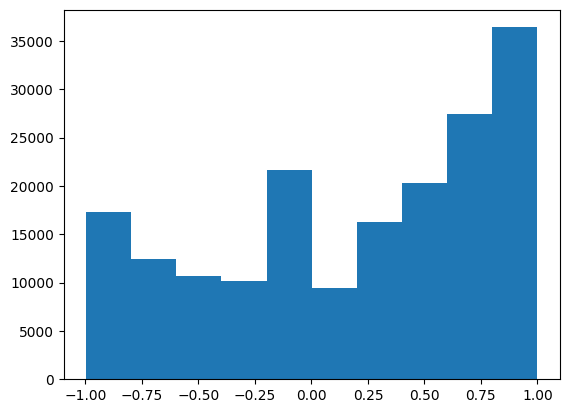

In [5]:
plt.figure()
plt.hist( compound, bins=10)
plt.show()

##### Plot compound score through time

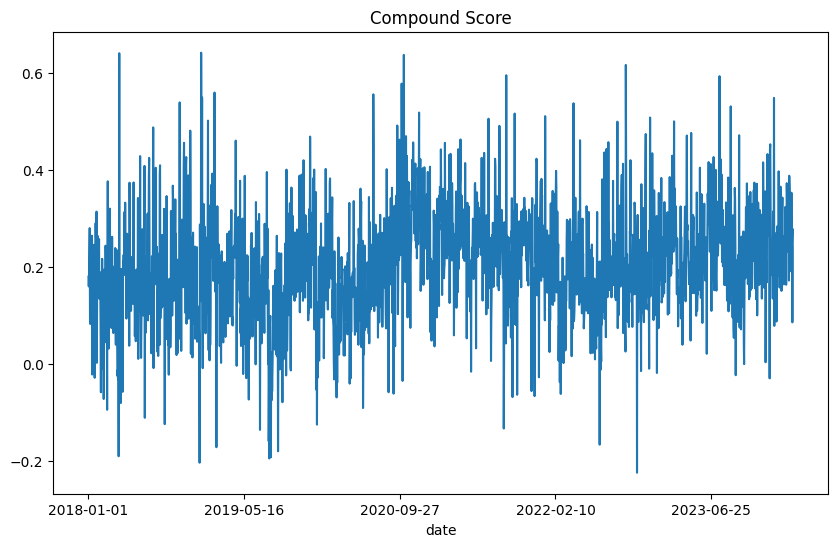

In [6]:
plt.figure( figsize=( 10, 6))

pd.DataFrame( {
	"date": [ df[ "published_date"][ i][ :10] for i in range( len( df))],
	"neg": df[ "neg"],
	"neu": df[ "neu"],
	"pos": df[ "pos"],
	"compound": df[ "compound"],
}).groupby( "date").mean()[ "compound"].plot()

plt.title( "Compound Score")
plt.show()

##### Saving result

In [7]:
df.to_csv( "data/result/cnbc-data-with-sentiment.csv", sep=";", index=False)